# Experimenting with data :)
*By Kamrine Poels*

In [85]:
%matplotlib inline
import numpy as np
import scipy as sp
import json
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from pyquery import PyQuery as pq
import requests
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [86]:
##### IMPORT THE DATA FRAME FROM 2015
import json
with open("tempdata/df.json") as json_file:
     df = json.load(json_file)
df = pd.read_json(df)

In [87]:
#initialize the dataframe with 1980 data
since_1980_df = pd.DataFrame()
since_1980_df = pd.read_csv('http://wichita.ogs.ou.edu/eq/catalog/1980/1980.csv')

# add additional years
for year in range(1981,2016):
    url = 'http://wichita.ogs.ou.edu/eq/catalog/' + str(year) + '/' + str(year) + '.csv'
    temp_df = pd.read_csv(url)
    # This might not be the most efficient method
    since_1980_df = since_1980_df.append(temp_df)
since_1980_df.head()

,id,origintime,latitude,longitude,depth,err_lon,err_lat,err_depth,err_origintime,county,origin_src,prefmag,pmag_type,pmag_src,mw,mw_src,mblg_ogs,mblg_usgs,ml_ogs,m3hz_ogs,md_ogs,mb,ms,mfa,max_mmi,reafile,reamtime,geom,pdlid,mw_ogs
0,255,1980-01-05 07:11:31.21,35.586,-97.894,5,NaN,NaN,NaN,NaN,CANADIAN,OGS,1.9,M3Hz,OGS,NaN,NaN,1.6,NaN,NaN,1.9,1.7,NaN,NaN,NaN,NaN,NaN,NaN,0101000020E6100000F0A7C64B377958C05EBA490C02CB...,NaN,NaN
1,256,1980-01-12 07:12:56.45,36.453,-97.642,5,NaN,NaN,NaN,NaN,GARFIELD,OGS,1.7,M3Hz,OGS,NaN,NaN,NaN,NaN,NaN,1.7,1.4,NaN,NaN,NaN,NaN,NaN,NaN,0101000020E61000000C022B87166958C0448B6CE7FB39...,NaN,NaN
2,257,1980-02-03 00:46:30.05,33.994,-97.463,5,NaN,NaN,NaN,NaN,LOVE,OGS,2.2,M3Hz,OGS,NaN,NaN,1.9,NaN,NaN,2.2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0101000020E61000001283C0CAA15D58C0AC1C5A643BFF...,NaN,NaN
3,258,1980-02-05 04:32:35.45,34.046,-97.451,5,NaN,NaN,NaN,NaN,LOVE,OGS,2.1,M3Hz,OGS,NaN,NaN,2.3,NaN,NaN,2.1,1.9,NaN,NaN,NaN,3,NaN,NaN,0101000020E6100000BE9F1A2FDD5C58C0D9CEF753E305...,NaN,NaN
4,259,1980-03-09 03:57:10.56,35.100,-95.100,5,NaN,NaN,NaN,NaN,HASKELL,OGS,1.2,M3Hz,OGS,NaN,NaN,1.4,NaN,NaN,1.2,1.4,NaN,NaN,NaN,NaN,NaN,NaN,0101000020E61000006666666666C657C0CDCCCCCCCC8C...,NaN,NaN


## Visualizations of earthquake data in 2015:

In [88]:
import time
#new_time= time.strptime("2015/01/01", "%Y/%m/%d")
year_day = []
for date in df.origintime.values:
    new_date = time.strptime(date, "%Y/%m/%d %H:%M:%S")
    year_day.append(new_date.tm_yday)    
df['year_day'] = year_day
df_byYear = df.groupby('year_day')

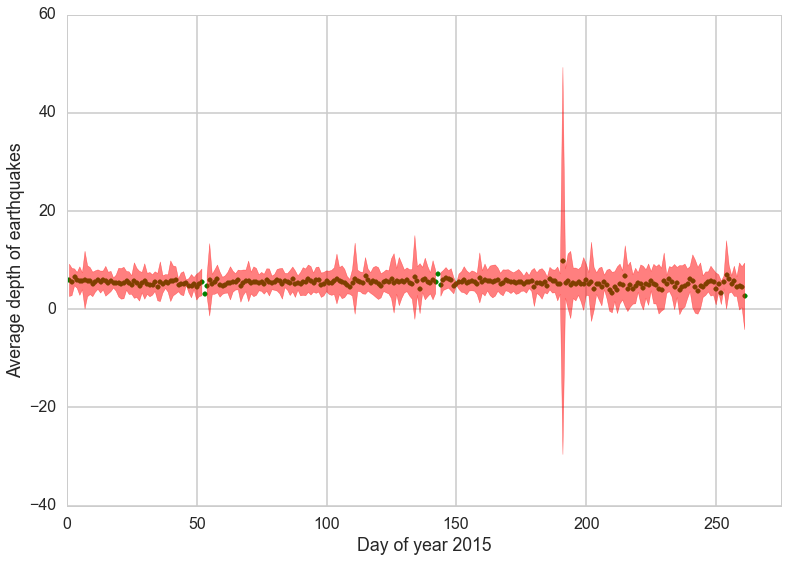

In [89]:
plt.scatter(df_byYear.groups.keys(), df_byYear["depth"].mean(), color = 'g')
plt.fill_between(df_byYear.groups.keys(), (df_byYear["depth"].mean()-2*df_byYear["depth"].std()), 
                 (df_byYear["depth"].mean()+2*df_byYear["depth"].std()), color = 'r', alpha = .5)
plt.xlim(0, 275)
plt.xlabel("Day of year 2015")
plt.ylabel("Average depth of earthquakes")

Average magnitude in 2015:  2.5524206625


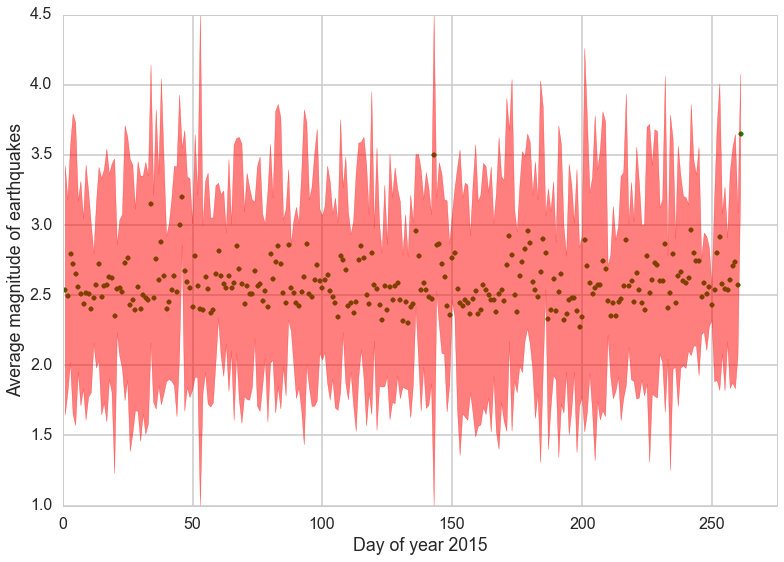

In [90]:
low = []
up = []
for mean, std in zip(df_byYear.prefmag.mean(), df_byYear.prefmag.std()):
    if std != std:
        low.append(1)
        up.append(4.5)
    else:
        low.append(mean-2*std)
        up.append(mean+2*std)
plt.scatter(df_byYear.groups.keys(), df_byYear["prefmag"].mean(), color = 'g')
plt.fill_between(df_byYear.groups.keys(), low, up, color = 'r', alpha = .5)
plt.xlim(0, 275)
plt.ylim(1,4.5)
plt.xlabel("Day of year 2015")
plt.ylabel("Average magnitude of earthquakes")
print "Average magnitude in 2015: ", df.prefmag.mean()

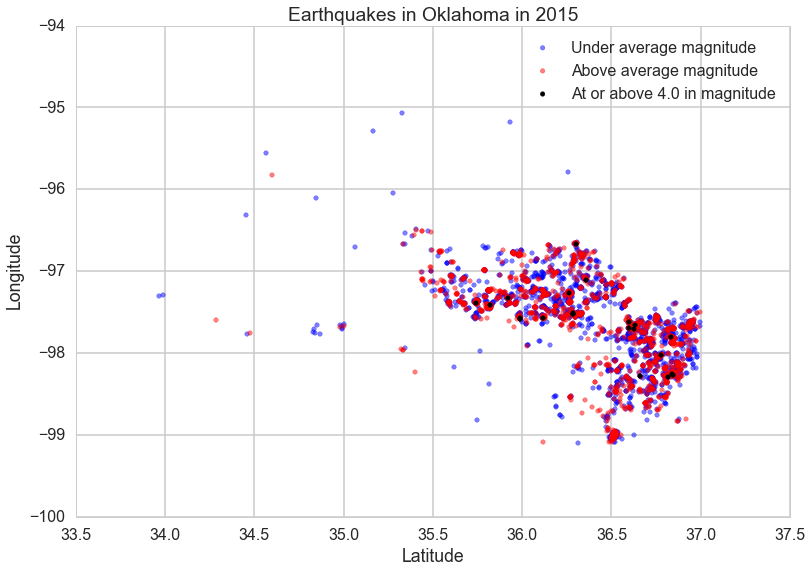

In [91]:
avgmag = df.prefmag.mean()
under_avgmag = [df.prefmag.values < avgmag]
above_avgmag = [df.prefmag.values > avgmag]
extreme = [df.prefmag.values >= 4]
plt.scatter(df.latitude.values[under_avgmag], df.longitude.values[under_avgmag], 
            color = 'b', label = "Under average magnitude", alpha =.5)
plt.scatter(df.latitude.values[above_avgmag], df.longitude.values[above_avgmag], color = 'r', 
            label = "Above average magnitude", alpha =.5)
plt.scatter(df.latitude.values[extreme], df.longitude.values[extreme], color = 'k', 
            label = "At or above 4.0 in magnitude")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Earthquakes in Oklahoma in 2015")
plt.legend()

There seems to be no area where earthquakes are most severe.

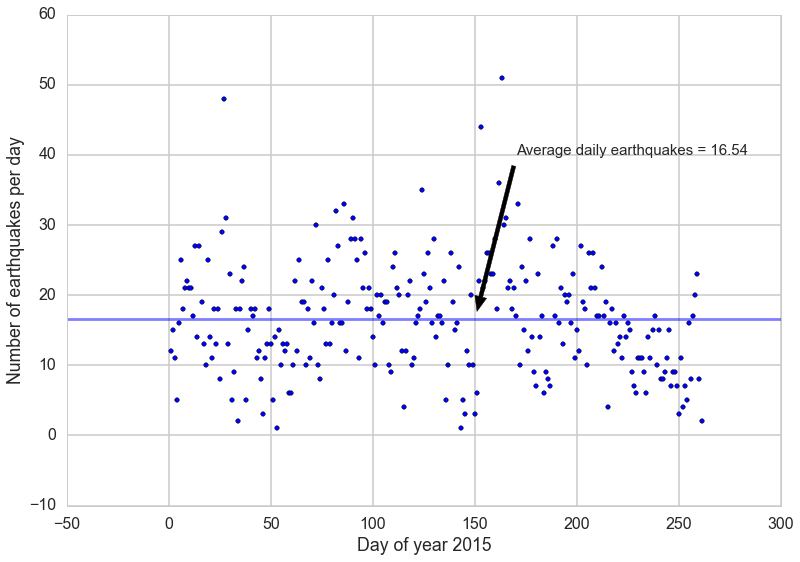

In [92]:
plt.scatter(df_byYear.groups.keys(), df_byYear['depth'].count())
plt.ylabel('Number of earthquakes per day')
plt.xlabel("Day of year 2015")
plt.axhline(df_byYear['depth'].count().mean(), alpha = .5)
plt.annotate("Average daily earthquakes = %.2f" % round(df_byYear['depth'].count().mean(),2),
             xy = (150,df_byYear['depth'].count().mean()), xytext = (170,40), 
             arrowprops=dict(facecolor='black', shrink=0.05), size = 15)

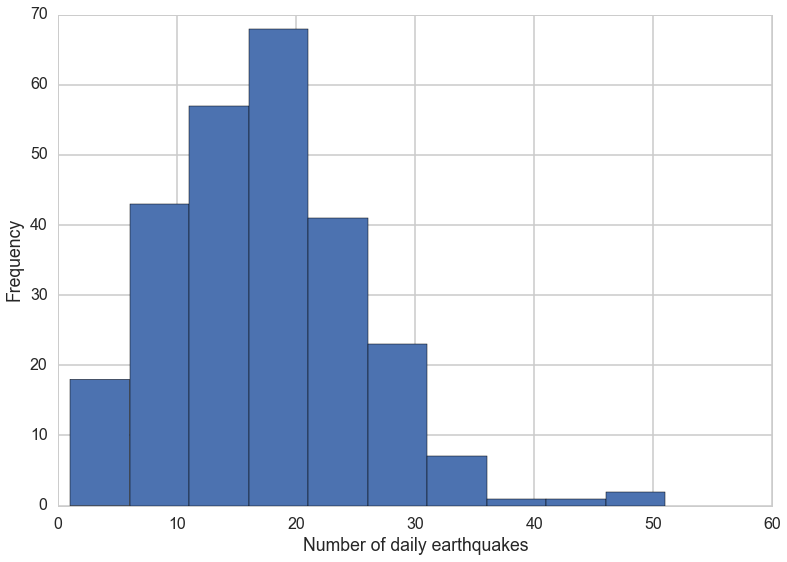

In [93]:
plt.hist(df_byYear['depth'].count().values)
plt.xlabel("Number of daily earthquakes")
plt.ylabel("Frequency")

Seems to follow normal distribution, slightly positively skewed

## Visualizations of earthquake data since 1980

In [94]:
import time
year_day = []
year = []
for date in since_1980_df.origintime.values:
    new_date = time.strptime(date[:19], "%Y-%m-%d %H:%M:%S")
    year_day.append(new_date.tm_yday)
    year.append(new_date.tm_year)
since_1980_df['year_day'] = year_day
since_1980_df['year'] = year
since_1980_df_byYear = since_1980_df.groupby('year')

Average magnitude of earthquakes since 1980:  2.19202365729


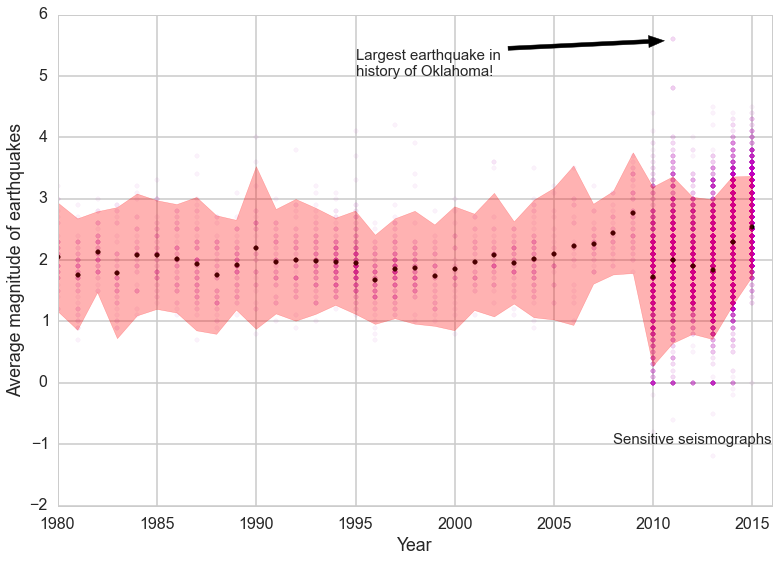

In [95]:
plt.scatter(since_1980_df.year,since_1980_df.prefmag , color = 'm', alpha = .05)
plt.scatter(since_1980_df_byYear.groups.keys(), since_1980_df_byYear["prefmag"].mean(), color = 'k')
plt.fill_between(since_1980_df_byYear.groups.keys(), (since_1980_df_byYear["prefmag"].mean()-2*since_1980_df_byYear["prefmag"].std()), 
                 (since_1980_df_byYear["prefmag"].mean()+2*since_1980_df_byYear["prefmag"].std()), color = 'r', alpha = .3)
plt.xlim(1980, 2016)
plt.xlabel("Year")
plt.ylabel("Average magnitude of earthquakes")
plt.annotate("Sensitive seismographs", xy = (2008,-1), size = 15)
plt.annotate("Largest earthquake in \nhistory of Oklahoma!", xy = (2011, 5.58), xytext = (1995,5), size =15,
            arrowprops=dict(facecolor='black', shrink=0.05))
print "Average magnitude of earthquakes since 1980: ", since_1980_df.prefmag.mean()

Magnitude seems to remain unaffected despite larger number of detected earthquakes. No need to plot number of earthquakes.See http://earthquake.usgs.gov/earthquakes/eqinthenews/2011/usb0006klz/ for largest earthquake in OK ;)

## Quick look at all combined data

In [271]:
all_df = pd.read_csv('http://wichita.ogs.ou.edu/eq/catalog/complete/complete.csv')

,id,origintime,latitude,longitude,depth,err_lon,err_lat,err_depth,err_origintime,county,origin_src,prefmag,pmag_type,pmag_src,mw,mw_src,mblg_ogs,mblg_usgs,ml_ogs,m3hz_ogs,md_ogs,mb,ms,mfa,max_mmi,reafile,reamtime,geom,pdlid,mw_ogs
0,1875,1882-10-22 22:15:30,34.0,-96.0,NaN,NaN,NaN,NaN,30,NaN,USGS,4.9,MFA,USGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,6,NaN,NaN,0101000020E610000000000000000058C0000000000000...,NaN,NaN
1,1,1901-04-08 13:30:00,36.0,-96.8,5,NaN,NaN,NaN,NaN,PAYNE,OGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,0101000020E610000033333333333358C0000000000000...,NaN,NaN
2,2,1918-09-10 16:30:00,35.5,-98.0,5,NaN,NaN,NaN,NaN,CANADIAN,OGS,3.4,mbLg,OGS,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,0101000020E610000000000000008058C00000000000C0...,NaN,NaN
3,1876,1918-09-11 05:30:30,35.5,-98.0,NaN,NaN,NaN,NaN,30,NaN,USGS,3.3,MFA,USGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3,6,NaN,NaN,0101000020E610000000000000008058C00000000000C0...,NaN,NaN
4,3,1918-09-11 06:30:00,35.5,-98.0,5,NaN,NaN,NaN,NaN,CANADIAN,OGS,3.4,mbLg,OGS,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,0101000020E610000000000000008058C00000000000C0...,NaN,NaN


In [298]:
year = []
for date in all_df.origintime.values:
    new_date = time.strptime(date[:19], "%Y-%m-%d %H:%M:%S")
    year.append(new_date.tm_year)    
all_df['year'] = year
all_df_byYear = all_df.groupby('year')

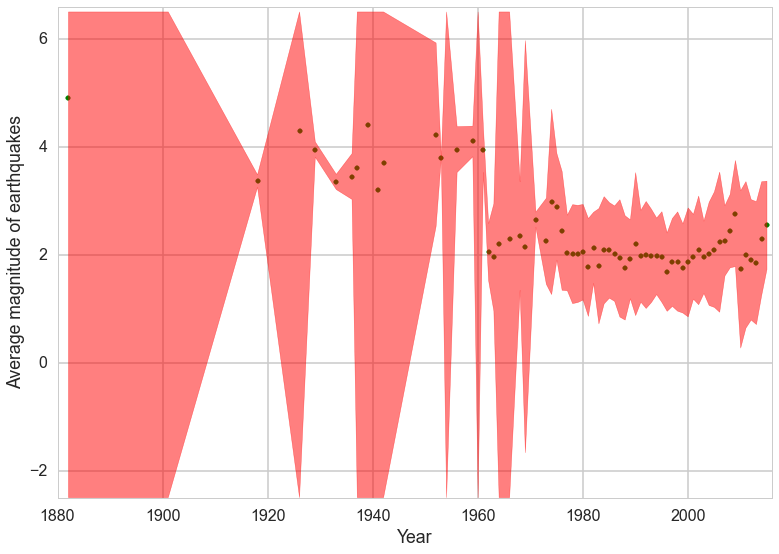

In [340]:
low = []
up = []
for mean, std in zip(all_df_byYear.prefmag.mean(), all_df_byYear.prefmag.std()):
    if std != std:
        low.append(-2.5)
        up.append(6.5)
    else:
        low.append(mean-2*std)
        up.append(mean+2*std)
plt.scatter(sorted(all_df_byYear.groups.keys()), all_df_byYear.prefmag.mean(), color = 'g')
plt.fill_between(sorted(all_df_byYear.groups.keys()), low, up, color = 'r', alpha = .5)
plt.xlim(1880, 2016)
plt.ylim(-2.5,6.6)
plt.xlabel("Year")
plt.ylabel("Average magnitude of earthquakes")

Ew, this looks ugly. It's best we work with data since 1980...

# Download *Fracking* data

Data taken from http://www.occeweb.com/og/ogdatafiles2.htm. I think there is better data out there since this contains only 852 fracking sites in OK.

In [101]:
import csv
with open('2013_FracFocusReport.txt') as inputfile:
    filetemp = list(csv.reader(inputfile))
fracfocus = {}
new_keys = filetemp[0][0].split("\t")
for key in new_keys:
    fracfocus[key] = []
for line in filetemp[1:]:
    new_items = line[0].split('\t')
    if len(new_items) == 15:
        for key, item in zip(new_keys, new_items):
            try:
                fracfocus[key].append(float(item))
            except:
                fracfocus[key].append(item)
fracfocus = pd.DataFrame(fracfocus)
fracfocus = fracfocus[fracfocus.state == 'Oklahoma']
print fracfocus.shape
fracfocus.head()

(852, 15)


,api,county,datum,fracture_date,latitude,longitude,operator,pdf_seqid,production_type,published,r_seqid,state,total_water_volume,true_vertical_depth,well_name
66,35-003-22379-00-00,Alfalfa,NAD27,2012-10-03,36.870004,-98.245130,SandRidge Energy,44827,Oil,2013-03-20 15:19:23.619209,41565,Oklahoma,1500114,5183,Fox 2810 3-26H
92,35-003-22495-00-00,Alfalfa,NAD27,2013-03-08,36.839823,-98.196894,SandRidge Energy,47442,Oil,2013-04-24 11:19:17.892085,44833,Oklahoma,1792182,5234,Stein Trust 2709 2-8H
99,35-003-22556-00-00,Alfalfa,NAD27,2013-03-28,36.958085,-98.356177,SandRidge Energy,48458,Oil,2013-05-03 12:19:49.346480,45710,Oklahoma,1415250,4898,Cecil 2911 4-26H
100,35-003-22511-00-00,Alfalfa,NAD27,2013-03-21,36.986320,-98.208290,SandRidge Energy,48473,Oil,2013-05-03 12:19:51.102388,45712,Oklahoma,1443942,4878,West 2909 4-18H
101,35-053-23208-00-00,Grant,NAD27,2013-03-22,36.766688,-97.796543,SandRidge Energy,48472,Oil,2013-05-03 12:20:23.493616,45741,Oklahoma,1772951,5105,Jackson 2606 3-1H


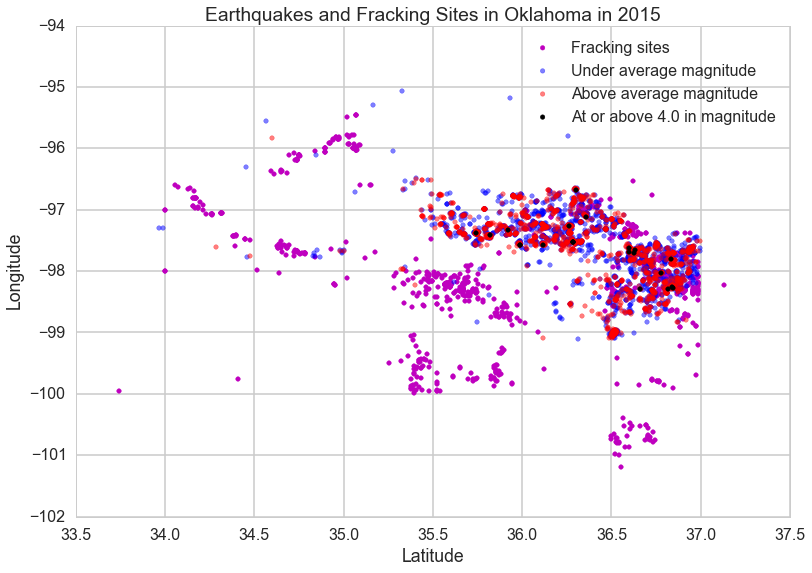

In [104]:
plt.scatter(fracfocus.latitude, fracfocus.longitude, label = 'Fracking sites', color = 'm')
plt.scatter(df.latitude.values[under_avgmag], df.longitude.values[under_avgmag], 
            color = 'b', label = "Under average magnitude", alpha =.5)
plt.scatter(df.latitude.values[above_avgmag], df.longitude.values[above_avgmag], color = 'r', 
            label = "Above average magnitude", alpha =.5)
plt.scatter(df.latitude.values[extreme], df.longitude.values[extreme], color = 'k', 
            label = "At or above 4.0 in magnitude")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Earthquakes and Fracking Sites in Oklahoma in 2015")
plt.legend()

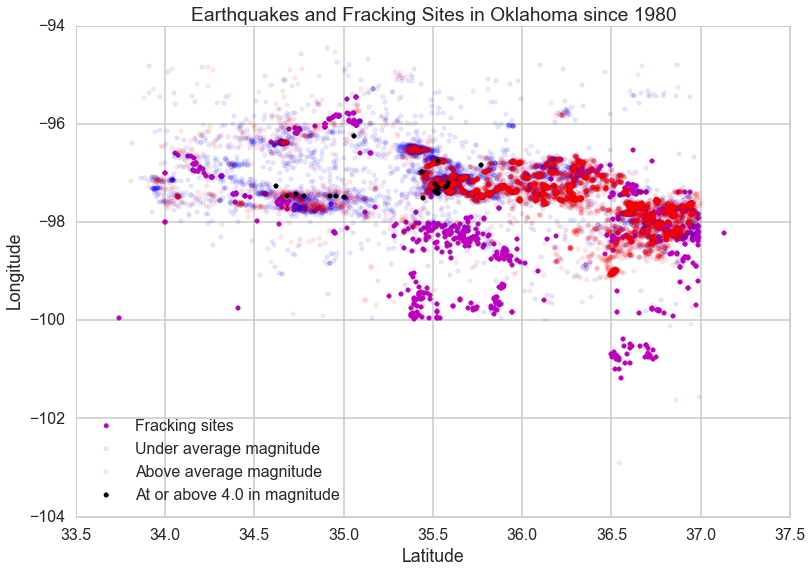

In [111]:
avgmag = since_1980_df.prefmag.mean()
under_avgmag = [since_1980_df.prefmag.values < avgmag]
above_avgmag = [since_1980_df.prefmag.values > avgmag]
plt.scatter(fracfocus.latitude, fracfocus.longitude, label = 'Fracking sites', color = 'm')
plt.scatter(since_1980_df.latitude.values[under_avgmag], since_1980_df.longitude.values[under_avgmag], 
            color = 'b', label = "Under average magnitude", alpha =.1)
plt.scatter(since_1980_df.latitude.values[above_avgmag], since_1980_df.longitude.values[above_avgmag], color = 'r', 
            label = "Above average magnitude", alpha =.1)
plt.scatter(since_1980_df.latitude.values[extreme], since_1980_df.longitude.values[extreme], color = 'k', 
            label = "At or above 4.0 in magnitude")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Earthquakes and Fracking Sites in Oklahoma since 1980")
plt.legend(loc =3)

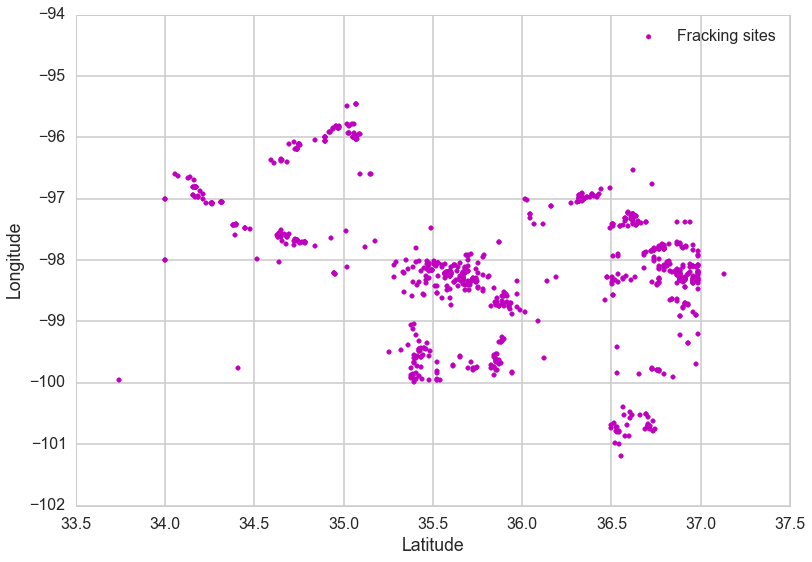

In [114]:
plt.scatter(fracfocus.latitude, fracfocus.longitude, label = 'Fracking sites', color = 'm')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.ylim(-102,-94)
plt.legend()